<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2022/blob/main/notebooks/04_Gradio_app_and_HF_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq timm gradio

     |████████████████████████████████| 509 kB 15.8 MB/s 
     |████████████████████████████████| 5.3 MB 57.2 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 270 kB 70.6 MB/s 
     |████████████████████████████████| 112 kB 71.1 MB/s 
     |████████████████████████████████| 2.3 MB 57.7 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 212 kB 50.1 MB/s 
     |████████████████████████████████| 57 kB 5.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 594 kB 45.7 MB/s 
     |████████████████████████████████| 856 kB 49.8 MB/s 
     |██████████████████████████

## Gradio Pets

It is often useful to get others a possibility to use your model. HF enables to host simple web apps under [HF Spaces](https://huggingface.co/spaces/jph00/pets). For example, this is [jph00/pets](https://huggingface.co/spaces/jph00/pets) app created by Jeremy Howard. 

Can we replicate it with Colab?

## Model training

In [2]:
from fastai.vision.all import *

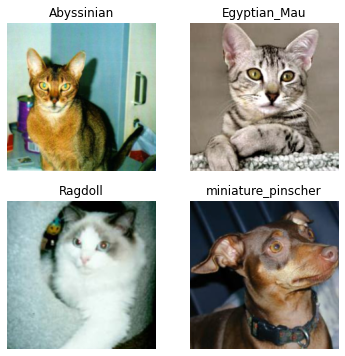

In [3]:
# PETS dataset is a part of fastai library
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

dls.show_batch(max_n=4)

In [4]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [7]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.527981,0.371262,0.887010,00:45


epoch,train_loss,valid_loss,accuracy,time
0,0.501394,0.344330,0.893775,00:45
1,0.324192,0.249107,0.916103,00:47
2,0.176562,0.239525,0.919486,00:46


In [8]:
learn.export('model.pkl')

## Gradio app

In [9]:
from fastai.vision.all import *
import gradio as gr

learn = load_learner('model.pkl')

To create Gradio app, two things need to be specified:


*   Input(s) and output types (interface)
*   A function that will process input into output 



In [10]:
# all possible lables
categories = learn.dls.vocab

# function for the prediction
def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [11]:
!wget https://huggingface.co/spaces/jph00/pets/resolve/main/basset.jpg

examples = ['basset.jpg']

--2022-09-18 10:06:23--  https://huggingface.co/spaces/jph00/pets/resolve/main/basset.jpg
Resolving huggingface.co (huggingface.co)... 52.202.207.64, 52.6.16.131, 2600:1f18:147f:e800:afa4:a769:1b42:e343, ...
Connecting to huggingface.co (huggingface.co)|52.202.207.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/aa/e3/aae372950067220ea6680a9eebefcbdf3e4046c45fabd8dfe4870b8de5e948a2/d4cb7457aedd287819ba4da40fd0adbac9447c09eb3b33416f9a1594c21126b1?response-content-disposition=attachment%3B%20filename%3D%22basset.jpg%22 [following]
--2022-09-18 10:06:23--  https://cdn-lfs.huggingface.co/repos/aa/e3/aae372950067220ea6680a9eebefcbdf3e4046c45fabd8dfe4870b8de5e948a2/d4cb7457aedd287819ba4da40fd0adbac9447c09eb3b33416f9a1594c21126b1?response-content-disposition=attachment%3B%20filename%3D%22basset.jpg%22
Resolving cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)... 65.9.86.11, 65.9.86.27, 65.9.86.14, ...
Connecting to cdn-lfs.h

In [12]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

In [ ]:
intf.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://24191.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


For hosting an app on HF Spaces, you need first to get yourself HF account, create an app (description) and then just [upload the files](https://huggingface.co/spaces/jph00/pets/tree/main) into HF Space repo. See [HF course](https://huggingface.co/course/chapter9/1) for details.

## Exercise (home work)

Create a gradio app based on the promoter classifier in Exercise 3.